 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"></ul></div>

In [1]:
library(Seurat)

Loading required package: ggplot2
Loading required package: cowplot

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave

Loading required package: Matrix


In [2]:
ctrl.data <- read.table("~/_Seurat/dataset1.txt", 
    sep = "\t")

In [27]:
head(ctrl.data)

ERROR while rich displaying an object: Error in sprintf(wrap, header, body): длина 'fmt' превышает максимальную длину формата 8192

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_latex.data.frame(obj)
9. repr_matrix_generic(obj, sprintf("\\begin{tabular}{%s}\n%%s%%s\\end{tabular}\n", 
 .     cols), "%s\\\\\n\\hline\n", "  &", " %s &", "%s", "\t%s\\\\\n", 
 .     "%s &", " %s &", escape_fun = latex_escape_vec, ...)
10. sp

,W29953,W29954,W29955,W29956,W29957,W29958,W29959,W29960,W29961,W29962,⋯,W76327,W76328,W76329,W76330,W76331,W76332,W76333,W76334,W76335,W76336
ENSMUSG00000000171,0,2,0,0,1,3,0,1,3,0,⋯,0,0,0,0,2,2,1,0,0,0
ENSMUSG00000000290,0,0,0,1,0,0,0,0,1,1,⋯,1,0,0,0,0,0,0,0,0,0
ENSMUSG00000000594,0,0,0,2,0,2,0,0,0,0,⋯,0,0,0,0,5,0,0,0,0,0
ENSMUSG00000001082,0,1,0,0,1,0,0,0,0,2,⋯,0,0,0,0,0,1,0,0,0,0
ENSMUSG00000001380,0,0,0,0,0,0,0,2,0,1,⋯,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000001750,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [3]:
stim.data <- read.table("~/_Seurat/dataset2.txt", 
    sep = "\t")

In [28]:
head(stim.data)

,HSPC_007,HSPC_013,HSPC_019,HSPC_025,HSPC_031,HSPC_037,LT.HSC_001,HSPC_001,HSPC_008,HSPC_014,⋯,Prog_851,Prog_809,Prog_816,Prog_822,Prog_828,Prog_834,Prog_840,Prog_846,Prog_852,Prog_810
ENSMUSG00000000171,7,4,3,83,5,3,60,6,212,62,⋯,161,941,173,963,1012,437,958,747,305,359
ENSMUSG00000000290,0,1,0,1,1,3,0,609,1,0,⋯,1,3,15,77,31,2,4,0,77,2
ENSMUSG00000000594,0,39,4,450,28,204,39,664,334,15,⋯,322,1334,102,81,881,1248,1929,1637,47,1826
ENSMUSG00000001082,4,18,1,3,4,7,2,4,167,96,⋯,45,1450,169,206,518,371,864,700,139,411
ENSMUSG00000001380,7,5,0,161,5,4,3,8,2,92,⋯,2,518,150,1470,1177,4,370,360,128,366
ENSMUSG00000001750,1,5,1,185,0,2,3,0,1,177,⋯,219,194,2,3,257,306,461,587,305,6


In [4]:
# Set up control object
ctrl <- CreateSeuratObject(raw.data = ctrl.data, project = "IMMUNE_CTRL", min.cells = 5)

In [5]:
ctrl@meta.data$stim <- "CTRL"

In [6]:
ctrl <- FilterCells(ctrl, subset.names = "nGene", low.thresholds = 500, high.thresholds = Inf)

In [7]:
ctrl <- NormalizeData(ctrl)

In [8]:
ctrl <- ScaleData(ctrl, display.progress = F)

In [9]:
# Set up stimulated object
stim <- CreateSeuratObject(raw.data = stim.data, project = "IMMUNE_STIM", min.cells = 5)
stim@meta.data$stim <- "STIM"
stim <- FilterCells(stim, subset.names = "nGene", low.thresholds = 500, high.thresholds = Inf)
stim <- NormalizeData(stim)
stim <- ScaleData(stim, display.progress = F)

In [10]:
# Gene selection for input to CCA
ctrl <- FindVariableGenes(ctrl, do.plot = F)

In [11]:
stim <- FindVariableGenes(stim, do.plot = F)

In [12]:
g.1 <- head(rownames(ctrl@hvg.info), 1000)

In [13]:
g.2 <- head(rownames(stim@hvg.info), 1000)

In [14]:
genes.use <- unique(c(g.1, g.2))
genes.use <- intersect(genes.use, rownames(ctrl@scale.data))
genes.use <- intersect(genes.use, rownames(stim@scale.data))

In [15]:
length(unique(genes.use))
length(genes.use)

[1] 1475

[1] 1475

In [16]:
immune.combined <- RunCCA(ctrl, stim, genes.use = genes.use, num.cc = 30)


[1] "Scaling data matrix"
  |======================================================================| 100%


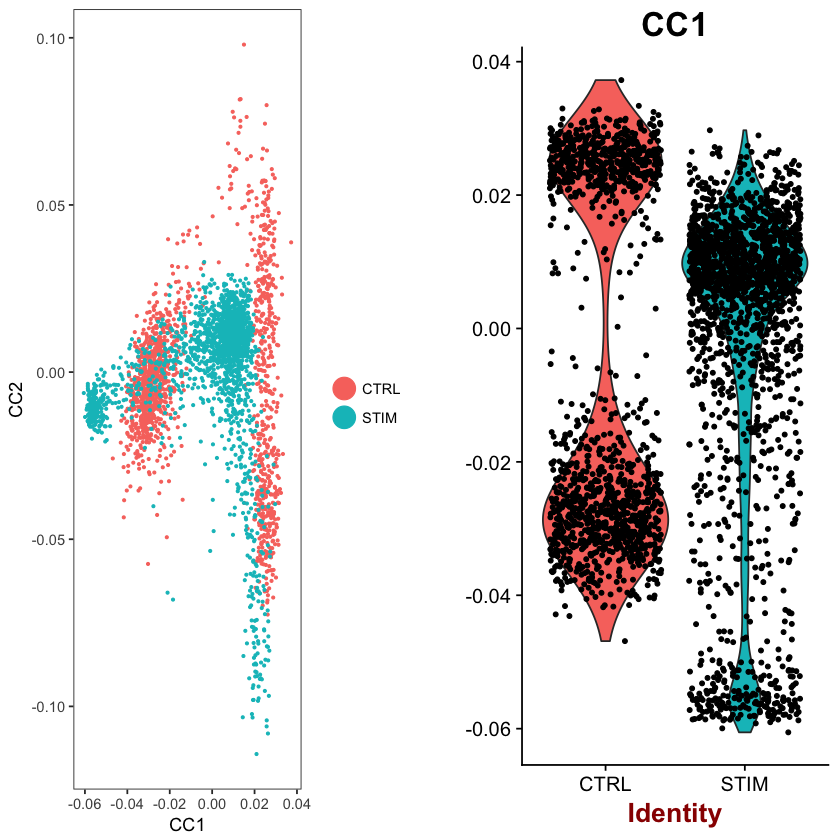

In [17]:
# visualize results of CCA plot CC1 versus CC2 and look at a violin plot
p1 <- DimPlot(object = immune.combined, reduction.use = "cca", group.by = "stim", 
    pt.size = 0.5, do.return = TRUE)
p2 <- VlnPlot(object = immune.combined, features.plot = "CC1", group.by = "stim", 
    do.return = TRUE)
plot_grid(p1, p2)

In [18]:
PrintDim(object = immune.combined, reduction.type = "cca", dims.print = 1:2, 
    genes.print = 10)

[1] "CC1"
 [1] "ENSMUSG00000027562" "ENSMUSG00000031762" "ENSMUSG00000028644"
 [4] "ENSMUSG00000028825" "ENSMUSG00000041237" "ENSMUSG00000061878"
 [7] "ENSMUSG00000042476" "ENSMUSG00000040466" "ENSMUSG00000054191"
[10] "ENSMUSG00000008843"
[1] ""
 [1] "ENSMUSG00000030707" "ENSMUSG00000026728" "ENSMUSG00000028581"
 [4] "ENSMUSG00000017493" "ENSMUSG00000030220" "ENSMUSG00000002204"
 [7] "ENSMUSG00000034353" "ENSMUSG00000068220" "ENSMUSG00000030579"
[10] "ENSMUSG00000021728"
[1] ""
[1] ""
[1] "CC2"
 [1] "ENSMUSG00000022584" "ENSMUSG00000031722" "ENSMUSG00000020125"
 [4] "ENSMUSG00000059498" "ENSMUSG00000024164" "ENSMUSG00000041754"
 [7] "ENSMUSG00000026822" "ENSMUSG00000034220" "ENSMUSG00000056124"
[10] "ENSMUSG00000001739"
[1] ""
 [1] "ENSMUSG00000060586" "ENSMUSG00000036594" "ENSMUSG00000006360"
 [4] "ENSMUSG00000073421" "ENSMUSG00000024610" "ENSMUSG00000037138"
 [7] "ENSMUSG00000030214" "ENSMUSG00000066363" "ENSMUSG00000042817"
[10] "ENSMUSG00000041959"
[1] ""
[1] ""


`geom_smooth()` using method = 'loess'


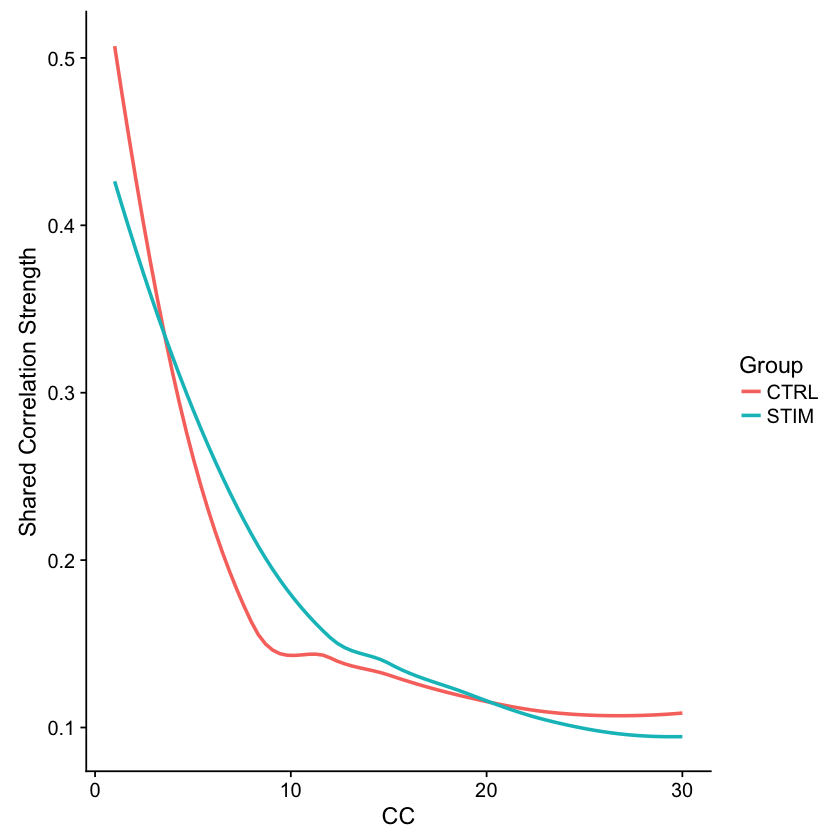

In [19]:
p3 <- MetageneBicorPlot(immune.combined, grouping.var = "stim", dims.eval = 1:30, 
    display.progress = FALSE)

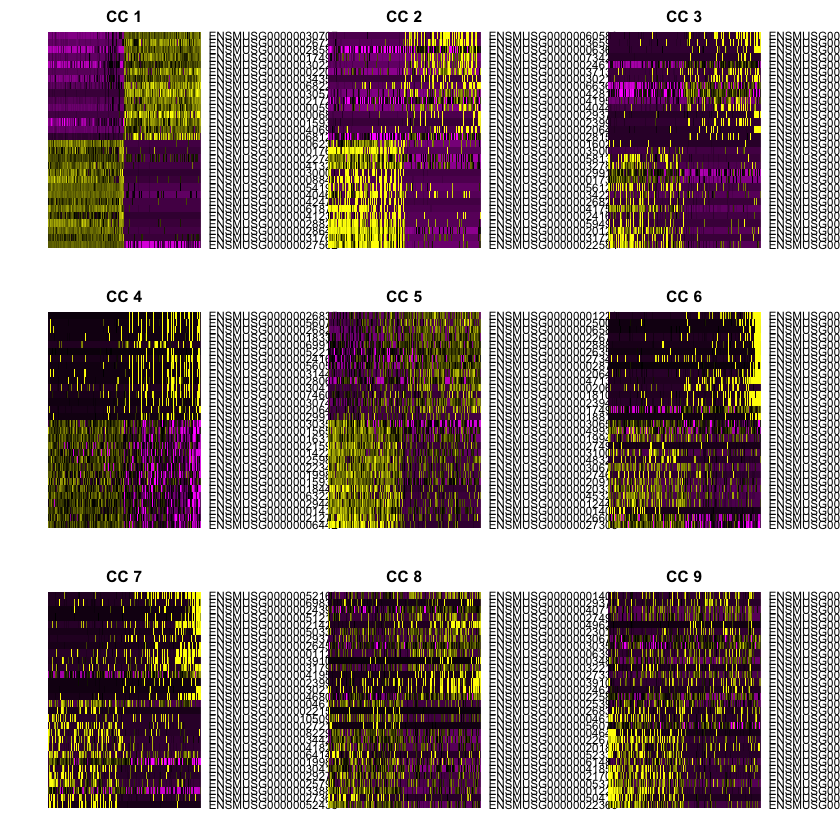

In [20]:
DimHeatmap(object = immune.combined, reduction.type = "cca", cells.use = 500, 
    dim.use = 1:9, do.balanced = TRUE)

In [29]:
immune.combined <- AlignSubspace(immune.combined, reduction.type = "cca", grouping.var = "stim", 
    dims.align = 1:10)

[1] "Scaling data matrix"
  |======================================================================| 100%
[1] "Scaling data matrix"
  |======================================================================| 100%


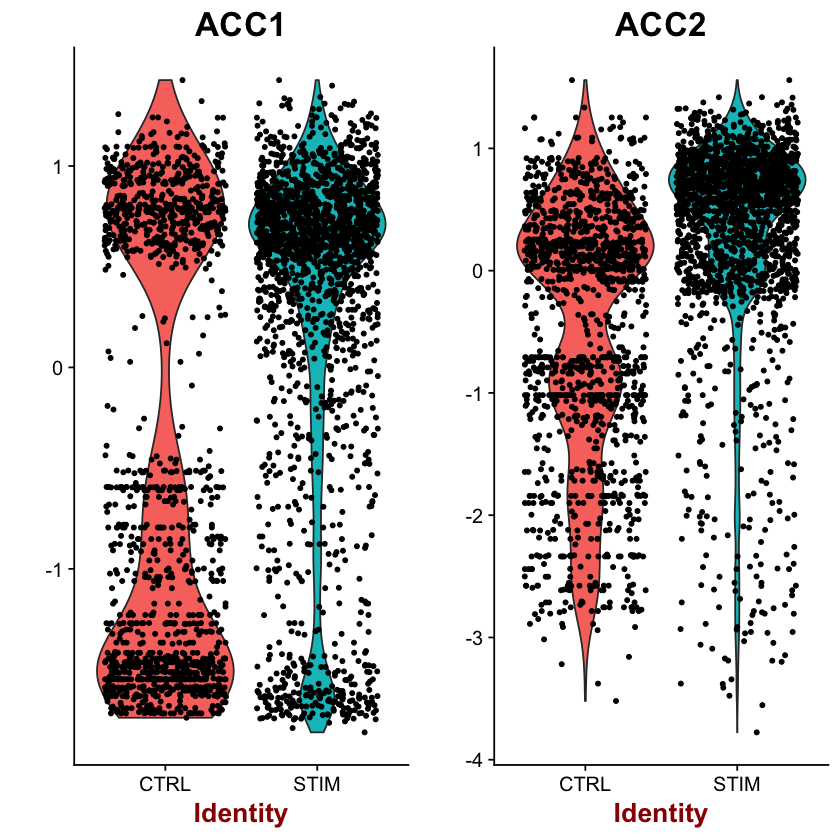

In [30]:
p1 <- VlnPlot(object = immune.combined, features.plot = "ACC1", group.by = "stim", 
    do.return = TRUE)
p2 <- VlnPlot(object = immune.combined, features.plot = "ACC2", group.by = "stim", 
    do.return = TRUE)
plot_grid(p1, p2)

In [23]:
# t-SNE and Clustering
immune.combined <- RunTSNE(immune.combined, reduction.use = "cca.aligned", dims.use = 1:20, 
    do.fast = T)
immune.combined <- FindClusters(immune.combined, reduction.type = "cca.aligned", 
    resolution = 0.6, dims.use = 1:20)

[1] "Constructing SNN"
  |======================================================================| 100%


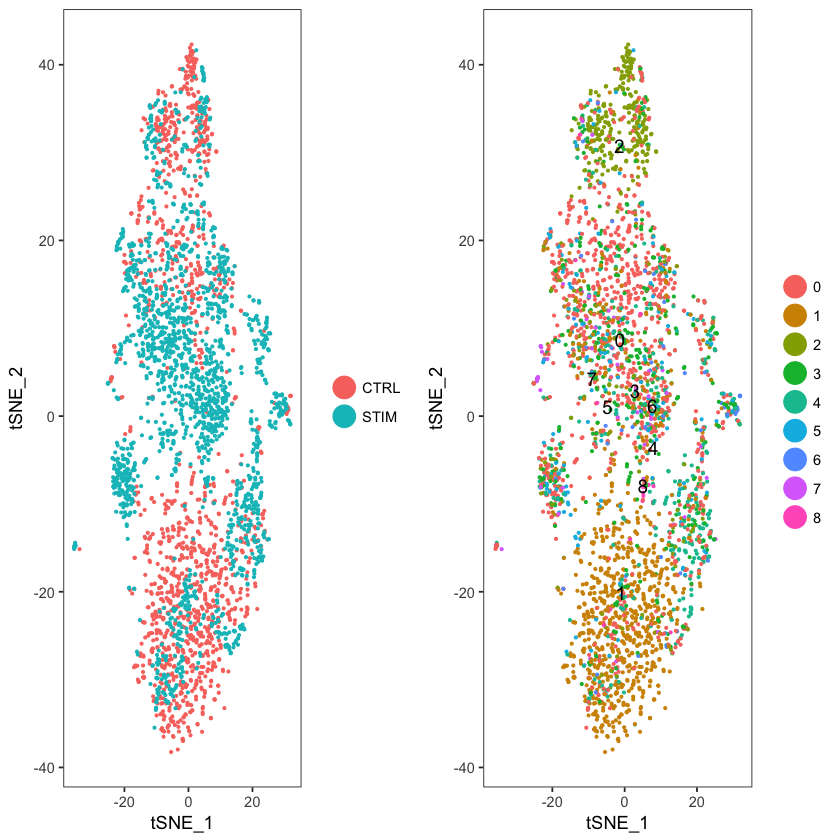

In [24]:
# Visualization
p1 <- TSNEPlot(immune.combined, do.return = T, pt.size = 0.5, group.by = "stim")
p2 <- TSNEPlot(immune.combined, do.label = T, do.return = T, pt.size = 0.5)
plot_grid(p1, p2)

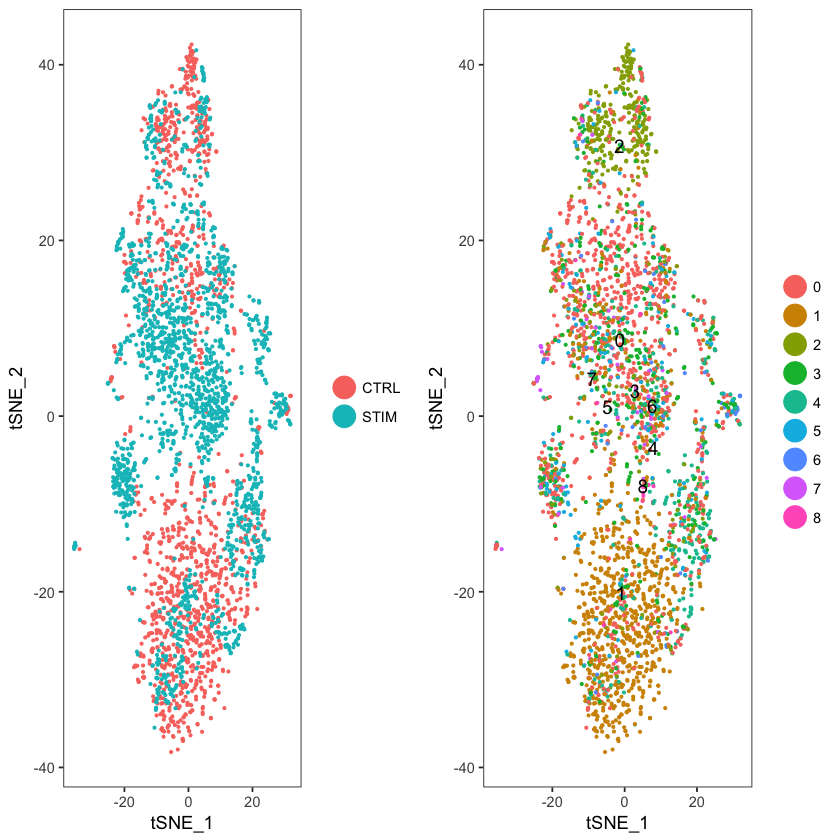

In [25]:
# Visualization
p1 <- TSNEPlot(immune.combined, do.return = T, pt.size = 0.5, group.by = "stim")
p2 <- TSNEPlot(immune.combined, do.label = T, do.return = T, pt.size = 0.5)
plot_grid(p1, p2)